**Лабораторна робота №1**

In [33]:
from sympy import symbols, Matrix as matr, derive_by_array as diff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (20,10)

In [34]:
x, y = symbols('x y')
#func = x**2  + 4*y**2 +0.001*x*y - y    # цільова функція, не арна     A - сим, дод визн
func = (x+8)**4 + (x+8)**2 + (y-3)**2 - 2*(x+8)*(y-3)
#func = (x+3)**2 + 10*(y-2)**2 + 2*(x+3)*(y-2) +(y-2)**4
#func = (x+3)**2 + 1000*(y-2)**2 + 2*(x+3)*(y-2)
#func = x**2 + 1000*y**2
steps = []

In [35]:
class GraDes:

    def __init__(self, func, method, x, y):
        self.f = func
        self.method = method                        # визначемо метод 
        self.args = list((x,y))                                  # наші аргументи(використовуемо їх для пошуку похідних)
        self.X = matr(self.args)                            # аргументи записані у матричному вигляді(для добутку)
        self.gradf = - matr(diff(func, self.args))
        self.A = matr((diff(diff(func, self.args), self.args)))
        self.b = matr(diff(func, self.args)) - self.A*self.X         #f(x) = 1/2(Ax,x) + (b,x)
        
    def gradient(self, x, method='analytical', h = 10**-4):   # x - матрица !
        s = list(zip(self.args, x))
        if method == 'analytical':
            return self.gradf.subs(s)
        """elif method == 'numerical':
            grad = matr([(self.f.subs(self.args[i], x[i] + h) + self.f.subs(self.args[i], x[i] - h)) / (2*h)\
                         for i in range(len(self.args))])                    #(f(x+h)-f(x-h))/2h
            #return grad.subs(s)   """

    
    def alpha(self, x_k, h):
        s = list(zip(self.args, x_k))
        if self.method == 'fastest_descent':
            alph = - ((self.A * x_k + self.b).dot(h)) / (self.A * h).dot(h)
            print('alpha = {}'.format(float(alph.subs(s))))
            return float(alph.subs(s))
        if self.method == 'split_step':
            a, b = 0.5, 1
            s = list(zip(self.args, x_k + b * h))                         # [(x, value), (y, value)]
            while func.subs(s) > func.subs(list(zip(self.args, x_k))):     #  f(x+bh) > f(x)
                b *= a
                s = list(zip(self.args, x_k + b * h))
            alph = b
            print('alpha = {}'.format(alph))
            return alph
       

    
    def find_min(self, x0, gradient_type='analytical', e=10**-4):
        s = list(zip(self.args, x0))
        x_k = matr(x0)
        h = self.gradient(x_k, gradient_type)                            
        x_k_1 = (x_k + self.alpha(x_k, h) * h).subs(s)
        steps.append(x_k_1)
        i = 0
        print('Length method: {}'.format(self.method))
        print('Iteration = {0}\n x_k = {1}\n f(x_k) = {2}\n x_k_1 = {3}\n f(x_k_1) = {4}\n'\
             .format(i, x_k, func.subs(list(zip(self.args, x_k))), x_k_1, func.subs(list(zip(self.args, x_k_1)))))
        while (x_k_1 - x_k).norm() > e: 
            x_k = x_k_1
            s = list(zip(self.args, x_k))
            h = self.gradient(x_k, gradient_type)
            x_k_1 = (x_k + self.alpha(x_k, h) * h).subs(s)
            i += 1
            steps.append(x_k_1)
            print('Iteration = {0}\n x_k = {1}\n f(x_k) = {2}\n x_k_1 = {3}\n f(x_k_1) = {4}\n'\
             .format(i, x_k, func.subs(list(zip(self.args, x_k))), x_k_1, func.subs(list(zip(self.args, x_k_1)))))
            print('error = {}\n\n'.format((x_k_1 - x_k).norm()))
        return #x_k_1.subs(s)

In [36]:
gd = GraDes(func, 'fastest_descent', x, y)           #split_step, fastest_descent
point = (1,1)
gd.find_min(point, gradient_type='analytical')    # analytical   numerical

alpha = 0.0010267199215981927
Length method: fastest_descent
Iteration = 0
 x_k = Matrix([[1], [1]])
 f(x_k) = 6682
 x_k_1 = Matrix([[-2.01650312965549], [1.02258783827516]])
 f(x_k_1) = 1345.17608910666

alpha = 0.0023171918569636547
Iteration = 1
 x_k = Matrix([[-2.01650312965549], [1.02258783827516]])
 f(x_k) = 1345.17608910666
 x_k_1 = Matrix([[-4.03897612197969], [1.05948174544144]])
 f(x_k_1) = 280.995204517923

error = 2.02280947324922


alpha = 0.005261180348979502
Iteration = 2
 x_k = Matrix([[-4.03897612197969], [1.05948174544144]])
 f(x_k) = 280.995204517923
 x_k_1 = Matrix([[-5.40894724015288], [1.12157990043464]])
 f(x_k_1) = 65.0480003806733

error = 1.37137779093956


alpha = 0.012197882706508841
Iteration = 3
 x_k = Matrix([[-5.40894724015288], [1.12157990043464]])
 f(x_k) = 65.0480003806733
 x_k_1 = Matrix([[-6.36672060378155], [1.23061611183271]])
 f(x_k_1) = 18.6942156491324

error = 0.963959911755990


alpha = 0.030569432291361727
Iteration = 4
 x_k = Matrix([[-6.36


error = 0.00328549186057242


alpha = 0.8269838669522482
Iteration = 38
 x_k = Matrix([[-8.12053585048903], [2.87656508677638]])
 f(x_k) = 0.000219493245783853
 x_k_1 = Matrix([[-8.11953777723392], [2.88136004299797]])
 f(x_k_1) = 0.000204989609403627

error = 0.00489772961580443


alpha = 0.3375803479994656
Iteration = 39
 x_k = Matrix([[-8.11953777723392], [2.88136004299797]])
 f(x_k) = 0.000204989609403627
 x_k_1 = Matrix([[-8.11662510845997], [2.88075387006532]])
 f(x_k_1) = 0.000191868268689444

error = 0.00297507731177320


alpha = 0.8326868648997819
Iteration = 40
 x_k = Matrix([[-8.11662510845997], [2.88075387006532]])
 f(x_k) = 0.000191868268689444
 x_k_1 = Matrix([[-8.11570663529680], [2.88511885037454]])
 f(x_k_1) = 0.000179920652089050

error = 0.00446056566494816


alpha = 0.33786928389245496
Iteration = 41
 x_k = Matrix([[-8.11570663529680], [2.88511885037454]])
 f(x_k) = 0.000179920652089050
 x_k_1 = Matrix([[-8.11305527202468], [2.88456103786926]])
 f(x_k_1) = 0.000169


error = 0.00101181449828474


alpha = 0.8775717395115128
Iteration = 72
 x_k = Matrix([[-8.08148180466440], [2.91763658947637]])
 f(x_k) = 0.0000448573274483555
 x_k_1 = Matrix([[-8.08113015130453], [2.91918393425127]])
 f(x_k_1) = 0.0000434227092436235

error = 0.00158680053501199


alpha = 0.34019654787353754
Iteration = 73
 x_k = Matrix([[-8.08113015130453], [2.91918393425127]])
 f(x_k) = 0.0000434227092436235
 x_k_1 = Matrix([[-8.08018978046345], [2.91897023260763]])
 f(x_k_1) = 0.0000420556336568345

error = 0.000964347298049575


alpha = 0.878978334788232
Iteration = 74
 x_k = Matrix([[-8.08018978046345], [2.91897023260763]])
 f(x_k) = 0.0000420556336568345
 x_k_1 = Matrix([[-8.07985345181038], [2.92044689323169]])
 f(x_k_1) = 0.0000407509001378870

error = 0.00151447798317503


alpha = 0.3402709599863381
Iteration = 75
 x_k = Matrix([[-8.07985345181038], [2.92044689323169]])
 f(x_k) = 0.0000407509001378870
 x_k_1 = Matrix([[-8.07895600219751], [2.92024249584011]])
 f(x_k_1) = 0

alpha = 0.3410585669088305
Iteration = 107
 x_k = Matrix([[-8.06513333649313], [2.93503447548062]])
 f(x_k) = 0.0000180257073008616
 x_k_1 = Matrix([[-8.06464190589147], [2.93492000805807]])
 f(x_k_1) = 0.0000176524167526670

error = 0.000504585797526566


alpha = 0.8943789466111446
Iteration = 108
 x_k = Matrix([[-8.06464190589147], [2.93492000805807]])
 f(x_k) = 0.0000176524167526670
 x_k_1 = Matrix([[-8.06445920898921], [2.93570363793874]])
 f(x_k_1) = 0.0000172904578934485

error = 0.000804645231126943


alpha = 0.3410913921469
Iteration = 109
 x_k = Matrix([[-8.06445920898921], [2.93570363793874]])
 f(x_k) = 0.0000172904578934485
 x_k_1 = Matrix([[-8.06398270321134], [2.93559254656802]])
 f(x_k_1) = 0.0000169394991038074

error = 0.000489284221072658


alpha = 0.8949674752536111
Iteration = 110
 x_k = Matrix([[-8.06398270321134], [2.93559254656802]])
 f(x_k) = 0.0000169394991038074
 x_k_1 = Matrix([[-8.06380529773162], [2.93635282183318]])
 f(x_k_1) = 0.0000165989874338912

error 


error = 0.000327926678883329


alpha = 0.9016580979167306
Iteration = 140
 x_k = Matrix([[-8.05600255789919], [2.94371314767972]])
 f(x_k) = 0.00000991711627307268
 x_k_1 = Matrix([[-8.05588176148248], [2.94422582041365]])
 f(x_k_1) = 0.00000976327424651036

error = 0.000526711596992905


alpha = 0.3414827729256384
Iteration = 141
 x_k = Matrix([[-8.05588176148248], [2.94422582041365]])
 f(x_k) = 0.00000976327424651036
 x_k_1 = Matrix([[-8.05556992363888], [2.94415234568524]])
 f(x_k_1) = 0.00000961297969670483

error = 0.000320376928657536


alpha = 0.9019975759363792
Iteration = 142
 x_k = Matrix([[-8.05556992363888], [2.94415234568524]])
 f(x_k) = 0.00000961297969670483
 x_k_1 = Matrix([[-8.05545181427829], [2.94465337047806]])
 f(x_k_1) = 0.00000946609663876607

error = 0.000514757869368995


alpha = 0.341501081645609
Iteration = 143
 x_k = Matrix([[-8.05545181427829], [2.94465337047806]])
 f(x_k) = 0.00000946609663876607
 x_k_1 = Matrix([[-8.05514705684510], [2.94458152906193]])


alpha = 0.3417223746929893
Iteration = 173
 x_k = Matrix([[-8.04999247881788], [2.95008518757443]])
 f(x_k) = 0.00000625227232586845
 x_k_1 = Matrix([[-8.04976861403559], [2.95003210688640]])
 f(x_k_1) = 0.00000617481978593126

error = 0.000230071728358632


alpha = 0.9063137481126965
Iteration = 174
 x_k = Matrix([[-8.04976861403559], [2.95003210688640]])
 f(x_k) = 0.00000617481978593126
 x_k_1 = Matrix([[-8.04968293807695], [2.95039332562262]])
 f(x_k_1) = 0.00000609878674961983

error = 0.000371240279712748


alpha = 0.34173429356039925
Iteration = 175
 x_k = Matrix([[-8.04968293807695], [2.95039332562262]])
 f(x_k) = 0.00000609878674961983
 x_k_1 = Matrix([[-8.04946317704634], [2.95034120177963]])
 f(x_k_1) = 0.00000602414799294460

error = 0.000225857932295323


alpha = 0.9065287097132588
Iteration = 176
 x_k = Matrix([[-8.04946317704634], [2.95034120177963]])
 f(x_k) = 0.00000602414799294460
 x_k_1 = Matrix([[-8.04937902829055], [2.95069587420060]])
 f(x_k_1) = 0.0000059508608750

alpha = 0.34188392867804684
Iteration = 205
 x_k = Matrix([[-8.04563270639345], [2.95442668629733]])
 f(x_k) = 0.00000433968357954617
 x_k_1 = Matrix([[-8.04546214825145], [2.95438607548441]])
 f(x_k_1) = 0.00000429472689394972

error = 0.000175326318416300


alpha = 0.9092295564331457
Iteration = 206
 x_k = Matrix([[-8.04546214825145], [2.95438607548441]])
 f(x_k) = 0.00000429472689394972
 x_k_1 = Matrix([[-8.04539641695289], [2.95466207441505]])
 f(x_k_1) = 0.00000425046078611491

error = 0.000283718193503262


alpha = 0.341892293169582
Iteration = 207
 x_k = Matrix([[-8.04539641695289], [2.95466207441505]])
 f(x_k) = 0.00000425046078611491
 x_k_1 = Matrix([[-8.04522847919315], [2.95462207891922]])
 f(x_k_1) = 0.00000420687495661376

error = 0.000172634674478858


alpha = 0.9093806487822814
Iteration = 208
 x_k = Matrix([[-8.04522847919315], [2.95462207891922]])
 f(x_k) = 0.00000420687495661376
 x_k_1 = Matrix([[-8.04516373446804], [2.95489387804068]])
 f(x_k_1) = 0.00000416395193464

alpha = 0.3420124122040194
Iteration = 241
 x_k = Matrix([[-8.04186608290452], [2.95817998179765]])
 f(x_k) = 0.00000307432076576686
 x_k_1 = Matrix([[-8.04173418387639], [2.95814847239783]])
 f(x_k_1) = 0.00000304743510623484

error = 0.000135610456451222


alpha = 0.9115518102365665
Iteration = 242
 x_k = Matrix([[-8.04173418387639], [2.95814847239783]])
 f(x_k) = 0.00000304743510623484
 x_k_1 = Matrix([[-8.04168307016797], [2.95836240216913]])
 f(x_k_1) = 0.00000302089871062616

error = 0.000219951263318749


alpha = 0.3420183897308124
Iteration = 243
 x_k = Matrix([[-8.04168307016797], [2.95836240216913]])
 f(x_k) = 0.00000302089871062616
 x_k_1 = Matrix([[-8.04155288483526], [2.95833129741811]])
 f(x_k_1) = 0.00000299470716894068

error = 0.000133849640976257


alpha = 0.9116599230391024
Iteration = 244
 x_k = Matrix([[-8.04155288483526], [2.95833129741811]])
 f(x_k) = 0.00000299470716894068
 x_k_1 = Matrix([[-8.04150242229695], [2.95854247021407]])
 f(x_k_1) = 0.00000296885297962

Iteration = 278
 x_k = Matrix([[-8.03879083866844], [2.96111497778049]])
 f(x_k) = 0.00000227308040007257
 x_k_1 = Matrix([[-8.03874964033102], [2.96128700427230]])
 f(x_k_1) = 0.00000225594905936544

error = 0.000176890974583341


alpha = 0.3421108137958475
Iteration = 279
 x_k = Matrix([[-8.03874964033102], [2.96128700427230]])
 f(x_k) = 0.00000225594905936544
 x_k_1 = Matrix([[-8.03864494589885], [2.96126193124218]])
 f(x_k_1) = 0.00000223901053808540

error = 0.000107654916125253


alpha = 0.9133323880101529
Iteration = 280
 x_k = Matrix([[-8.03864494589885], [2.96126193124218]])
 f(x_k) = 0.00000223901053808540
 x_k_1 = Matrix([[-8.03860420337106], [2.96143203548850]])
 f(x_k_1) = 0.00000222226119928060

error = 0.000174915431536714


alpha = 0.3421152294637101
Iteration = 281
 x_k = Matrix([[-8.03860420337106], [2.96143203548850]])
 f(x_k) = 0.00000222226119928060
 x_k_1 = Matrix([[-8.03850067837701], [2.96140723975699]])
 f(x_k_1) = 0.00000220569898737311

error = 0.000106453053

In [37]:
from scipy.optimize import minimize                                      # проверка 

def f(ar):
    x, y = ar
    return x**2 + 4*y**2 + 0.01*x*y - y

res = minimize(f, point)
print(res)

      fun: -0.06250039062744114
 hess_inv: array([[ 0.50000313, -0.000625  ],
       [-0.000625  ,  0.12500078]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.00062501,  0.12500077])


# Графіки


In [6]:
steps = np.array(steps).astype(np.float64)

In [7]:
X1 = np.linspace(-0.05, 0.15, 100)
X2 = np.linspace(0.1, 0.3, 100)
X1, X2 = np.meshgrid(X1, X2)

In [8]:
Y = X1**2  + 4*X2**2 +0.001*X1@X2 - X2   

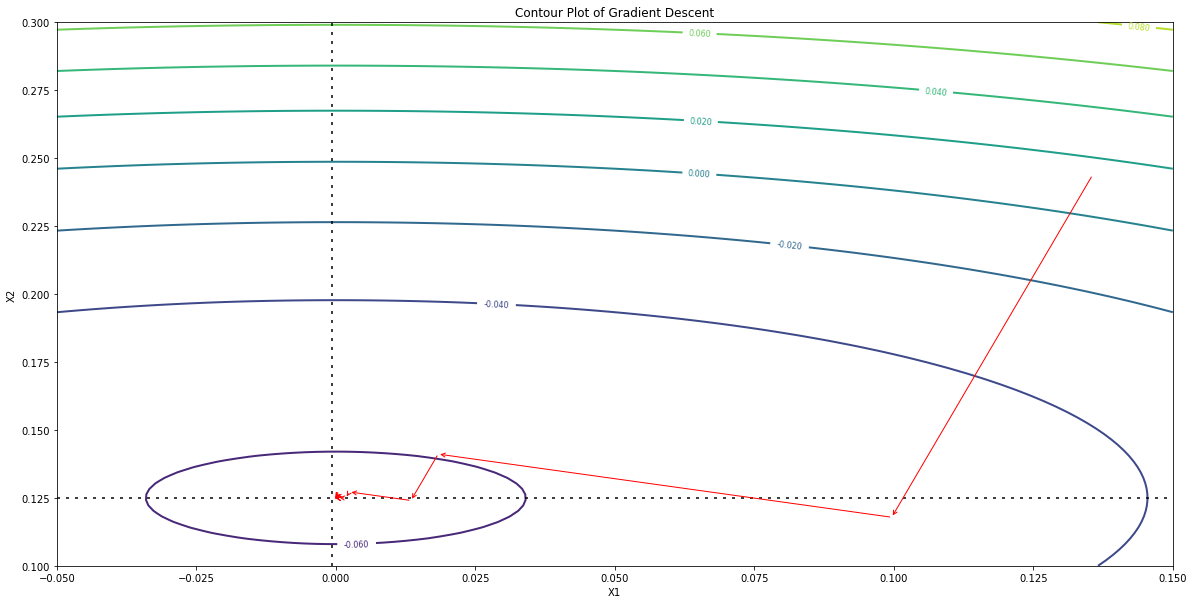

In [9]:
plt.axhline(0.12500077, color='black', alpha=1, dashes=[2, 4],linewidth=1.5)
plt.axvline(-0.00062501, color='black', alpha=1, dashes=[2, 4],linewidth=1.5)
for i in range(1, len(steps) - 1):
    plt.annotate('', xy=steps[i + 1, :], xytext=steps[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
cp = plt.contour(X1, X2, Y, linestyles='solid', linewidths=2)
plt.clabel(cp, inline=1, fontsize=8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Contour Plot of Gradient Descent")
plt.show()

In [10]:
df = pd.DataFrame(columns = ['point', 'fast', 'split'], data = [[(0,0), 2, 3], [(1,1), 14, 13], [(10, 10), 16, 14],[(100, 100), 18, 15], 
                                                               [(1000,1000), 20, 14],[(-1,-1), 12, 13], [(-10,-10), 16, 15],[(-100, -100), 18, 15],
                                                               [(5, -8), 11, 13]])

In [11]:
df

,point,fast,split
0,"(0, 0)",2,3
1,"(1, 1)",14,13
2,"(10, 10)",16,14
3,"(100, 100)",18,15
4,"(1000, 1000)",20,14
5,"(-1, -1)",12,13
6,"(-10, -10)",16,15
7,"(-100, -100)",18,15
8,"(5, -8)",11,13


In [ ]:
# для другой функции: (1, 1)   1659    2042